<a href="https://colab.research.google.com/github/Rindlin/Simpson-Int/blob/main/Integral_Simpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

N = 10:
  Integral Value: 3.141592613939215
  RMS Error: 3.9650577932093256e-08
  Execution Time: 4.267692565917969e-05 seconds

N = 100:
  Integral Value: 3.1415926535897527
  RMS Error: 4.04121180963557e-14
  Execution Time: 7.176399230957031e-05 seconds

N = 1000:
  Integral Value: 3.141592653589796
  RMS Error: 2.6645352591003757e-15
  Execution Time: 0.0006251335144042969 seconds

N = 10000:
  Integral Value: 3.141592653589789
  RMS Error: 3.9968028886505635e-15
  Execution Time: 0.0060579776763916016 seconds



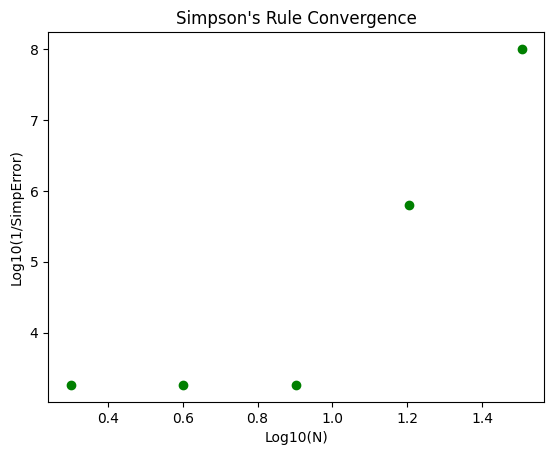

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Fungsi yang diintegrasikan
def f(x):
    return 4 / (1 + x**2)

# Fungsi integrasi metode Simpson
def simpsons(a, b, N):
    dx = abs((b - a) / N)

    OddSum = 0.0
    EvenSum = 0.0

    for k in range(1, N, 2):
        OddSum += f(a + k * dx)

    for k in range(2, N, 2):
        EvenSum += f(a + k * dx)

    I = (1.0 / 3.0) * dx * (f(a) + f(b) + 4 * OddSum + 2 * EvenSum)
    return I

# Nilai referensi pi
pi_ref = 3.14159265358979323846

# Nilai-nilai N yang akan diuji
N_values = [10, 100, 1000, 10000]

# Dictionary untuk menyimpan hasil
results = {}

for N in N_values:
    start_time = time.time()

    integral_value = simpsons(0, 1, N)

    end_time = time.time()
    execution_time = end_time - start_time
    rms_error = np.sqrt((integral_value - pi_ref)**2)

    results[N] = {
        'Integral Value': integral_value,
        'RMS Error': rms_error,
        'Execution Time': execution_time
    }

# Display the results
for N, result in results.items():
    print(f"N = {N}:")
    print(f"  Integral Value: {result['Integral Value']}")
    print(f"  RMS Error: {result['RMS Error']}")
    print(f"  Execution Time: {result['Execution Time']} seconds\n")

# Bagian iterasi untuk menemukan N yang sesuai dengan kesalahan kecil
N = 2
In = simpsons(0, 1, 2)
In1 = simpsons(0, 1, 4)
SimpError = 100000

# List untuk menyimpan nilai N dan kesalahan
N_list = []
error_list = []

while SimpError > 1e-6:
    simpsons(0, 1, N)

    SimpError = abs((1.0 / 15) * (In1 - In))

    N_list.append(np.log10(N))
    error_list.append(np.log10(1 / SimpError))

    In = In1
    In1 = simpsons(0, 1, N)
    N *= 2

# Plotting log10(N) vs log10(1/SimpError)
plt.plot(N_list, error_list, 'go')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(1/SimpError)')
plt.title('Simpson\'s Rule Convergence')
plt.show()
